In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

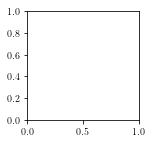

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [3]:
job_dir = 'ecoC01B05_wt0.1_psi_rada'

t_headle = '(.*?).pickle'

In [4]:
n_load = 10000
rand_mode=False

t_dir = os.path.join(PWD, job_dir)
# _ = spf_tb.load_rand_data_pickle_dir_v2(t_dir, t_headle, n_load=n_load, rand_mode=rand_mode)
t_name = os.path.join(os.getcwd(), 'ecoC01B05_phase_Peclet', '%s.pickle' % job_dir)
with open(t_name, 'rb') as myinput:
    _ = pickle.load(myinput)
ini_theta_list, ini_phi_list, ini_psi_list, std_eta_list, psi_max_phi_list, \
theta_autocorrelate_fre_list, phi_autocorrelate_fre_list, psi_autocorrelate_fre_list, \
eta_autocorrelate_fre_list, dx_list, dy_list, dz_list, pickle_path_list = _

In [5]:
t_name = os.path.join(os.getcwd(), 'ecoC01B05_phase_Peclet', '%s.pickle' % job_dir)
with open(t_name, 'wb') as handle:    
    pickle.dump(_, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_phase_Peclet/ecoC01B05_wt0.1_psi_rada.pickle


In [6]:
n_load = 10000
rand_mode=False

t_dir = os.path.join(PWD, job_dir)
_ = spf_tb.load_rand_data_pickle_dir_instant(t_dir, t_headle, n_load=n_load, rand_mode=rand_mode, 
                                             t_step=10)
pickle_path_list, idx_list, intp_t, intp_X_list = _

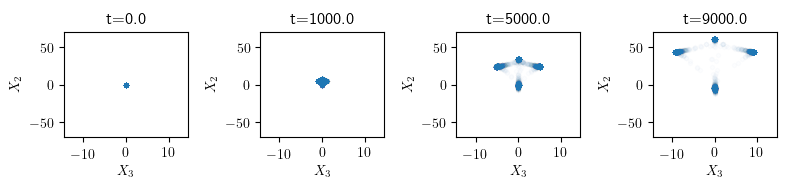

In [13]:
figsize = np.array((8, 2)) * 1
dpi = 100
use_Tidx_list = [0, 100, 500, 900]
# x_lim = [intp_X_list[:, 2, :].min(), intp_X_list[:, 2, :].max()]
# y_lim = [intp_X_list[:, 1, :].min(), intp_X_list[:, 1, :].max()]
x_lim = [-14.5, 14.5]
y_lim = [-70, 70]

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
# fig.patch.set_facecolor('white')
# for intp_X in intp_X_list:
#     axi.plot(intp_t, intp_X[:, 1])

fig_nrow = 1
fig_ncol = int(np.ceil(len(use_Tidx_list) / fig_nrow))
fig, axs = plt.subplots(fig_nrow, fig_ncol, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')
for axi, use_Tidx in zip(axs.ravel(), use_Tidx_list):
    tx = intp_X_list[use_Tidx, 2, :]
    ty = intp_X_list[use_Tidx, 1, :]
    axi.plot(tx, ty, '.', alpha=0.01)
    axi.set_title('t=%.1f' % intp_t[use_Tidx])
    axi.set_xlim(*x_lim)
    axi.set_ylim(*y_lim)
    axi.set_xlabel('$X_3$')
    axi.set_ylabel('$X_2$')

plt.tight_layout()

[[   0    1    2    3    4    5    6    7]
 [3351    9 5097 1536    4    1    1    1]]

0 3351 0.6149316778298668 0.0629139882273171
1 9 0.6191893974231638 0.08843738509440655
2 5097 0.7346743836504157 0.07684607496342491
3 1536 0.9423527231017212 0.04203691940830908
4 4 0.007595202778618179 0.004161650914406868
5 1 0.9907332062633465 0.005473018187177179
6 1 0.005206363544180314 0.002287536123249596
7 1 0.0032940038891112315 0.0012114338742216066


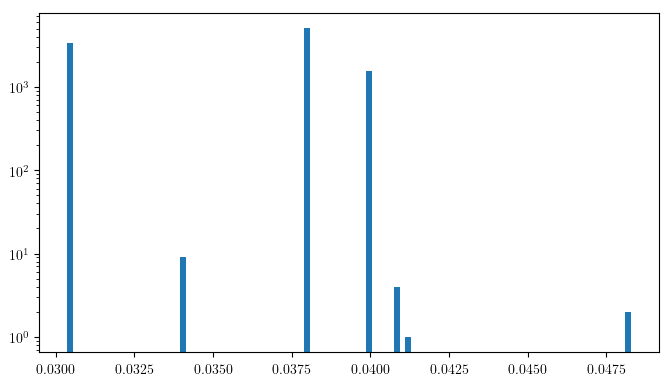

In [5]:
n_hist = 100
figsize = np.array((16, 9)) * 0.5
dpi = 100
# use_autocorrelate_fre_list =theta_autocorrelate_fre_list
use_autocorrelate_fre_list = eta_autocorrelate_fre_list

tmax_fre_list = np.hstack([t1[0, 0] for t1 in use_autocorrelate_fre_list])
# tmax_fre_list = tmax_fre_list[tmax_fre_list < 0.04]
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
t1 = axi.hist(tmax_fre_list, n_hist)
axi.set_yscale('log')

bin_edges = np.histogram_bin_edges(tmax_fre_list, n_hist)
case_idx0 = np.digitize(tmax_fre_list, bin_edges)
case_idx = np.ones_like(case_idx0) * -1
for i1, i0 in enumerate(np.unique(case_idx0)):
    tidx = np.isclose(case_idx0, i0)
    case_idx[tidx] = i1
assert np.all(case_idx >= 0)
print(np.vstack((np.unique(case_idx), np.bincount(case_idx))))
print()

for use_case, n_case in zip(np.unique(case_idx), np.bincount(case_idx)):
    tidx = np.isclose(case_idx, use_case)
    # np.mean(psi_max_phi_list[tidx][psi_max_phi_list[tidx] > np.pi])
    print(use_case, n_case, np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max())

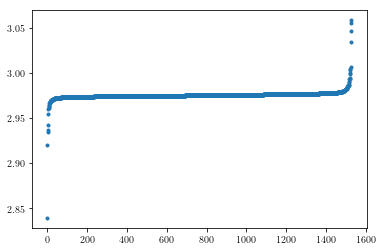

In [15]:
teta = np.hstack([i0[0] for i0 in std_eta_list])
tidx = np.isclose(case_idx, 3)

# np.sort(teta[tidx])[:8]
plt.plot(np.sort(teta[tidx])[8:], '.')

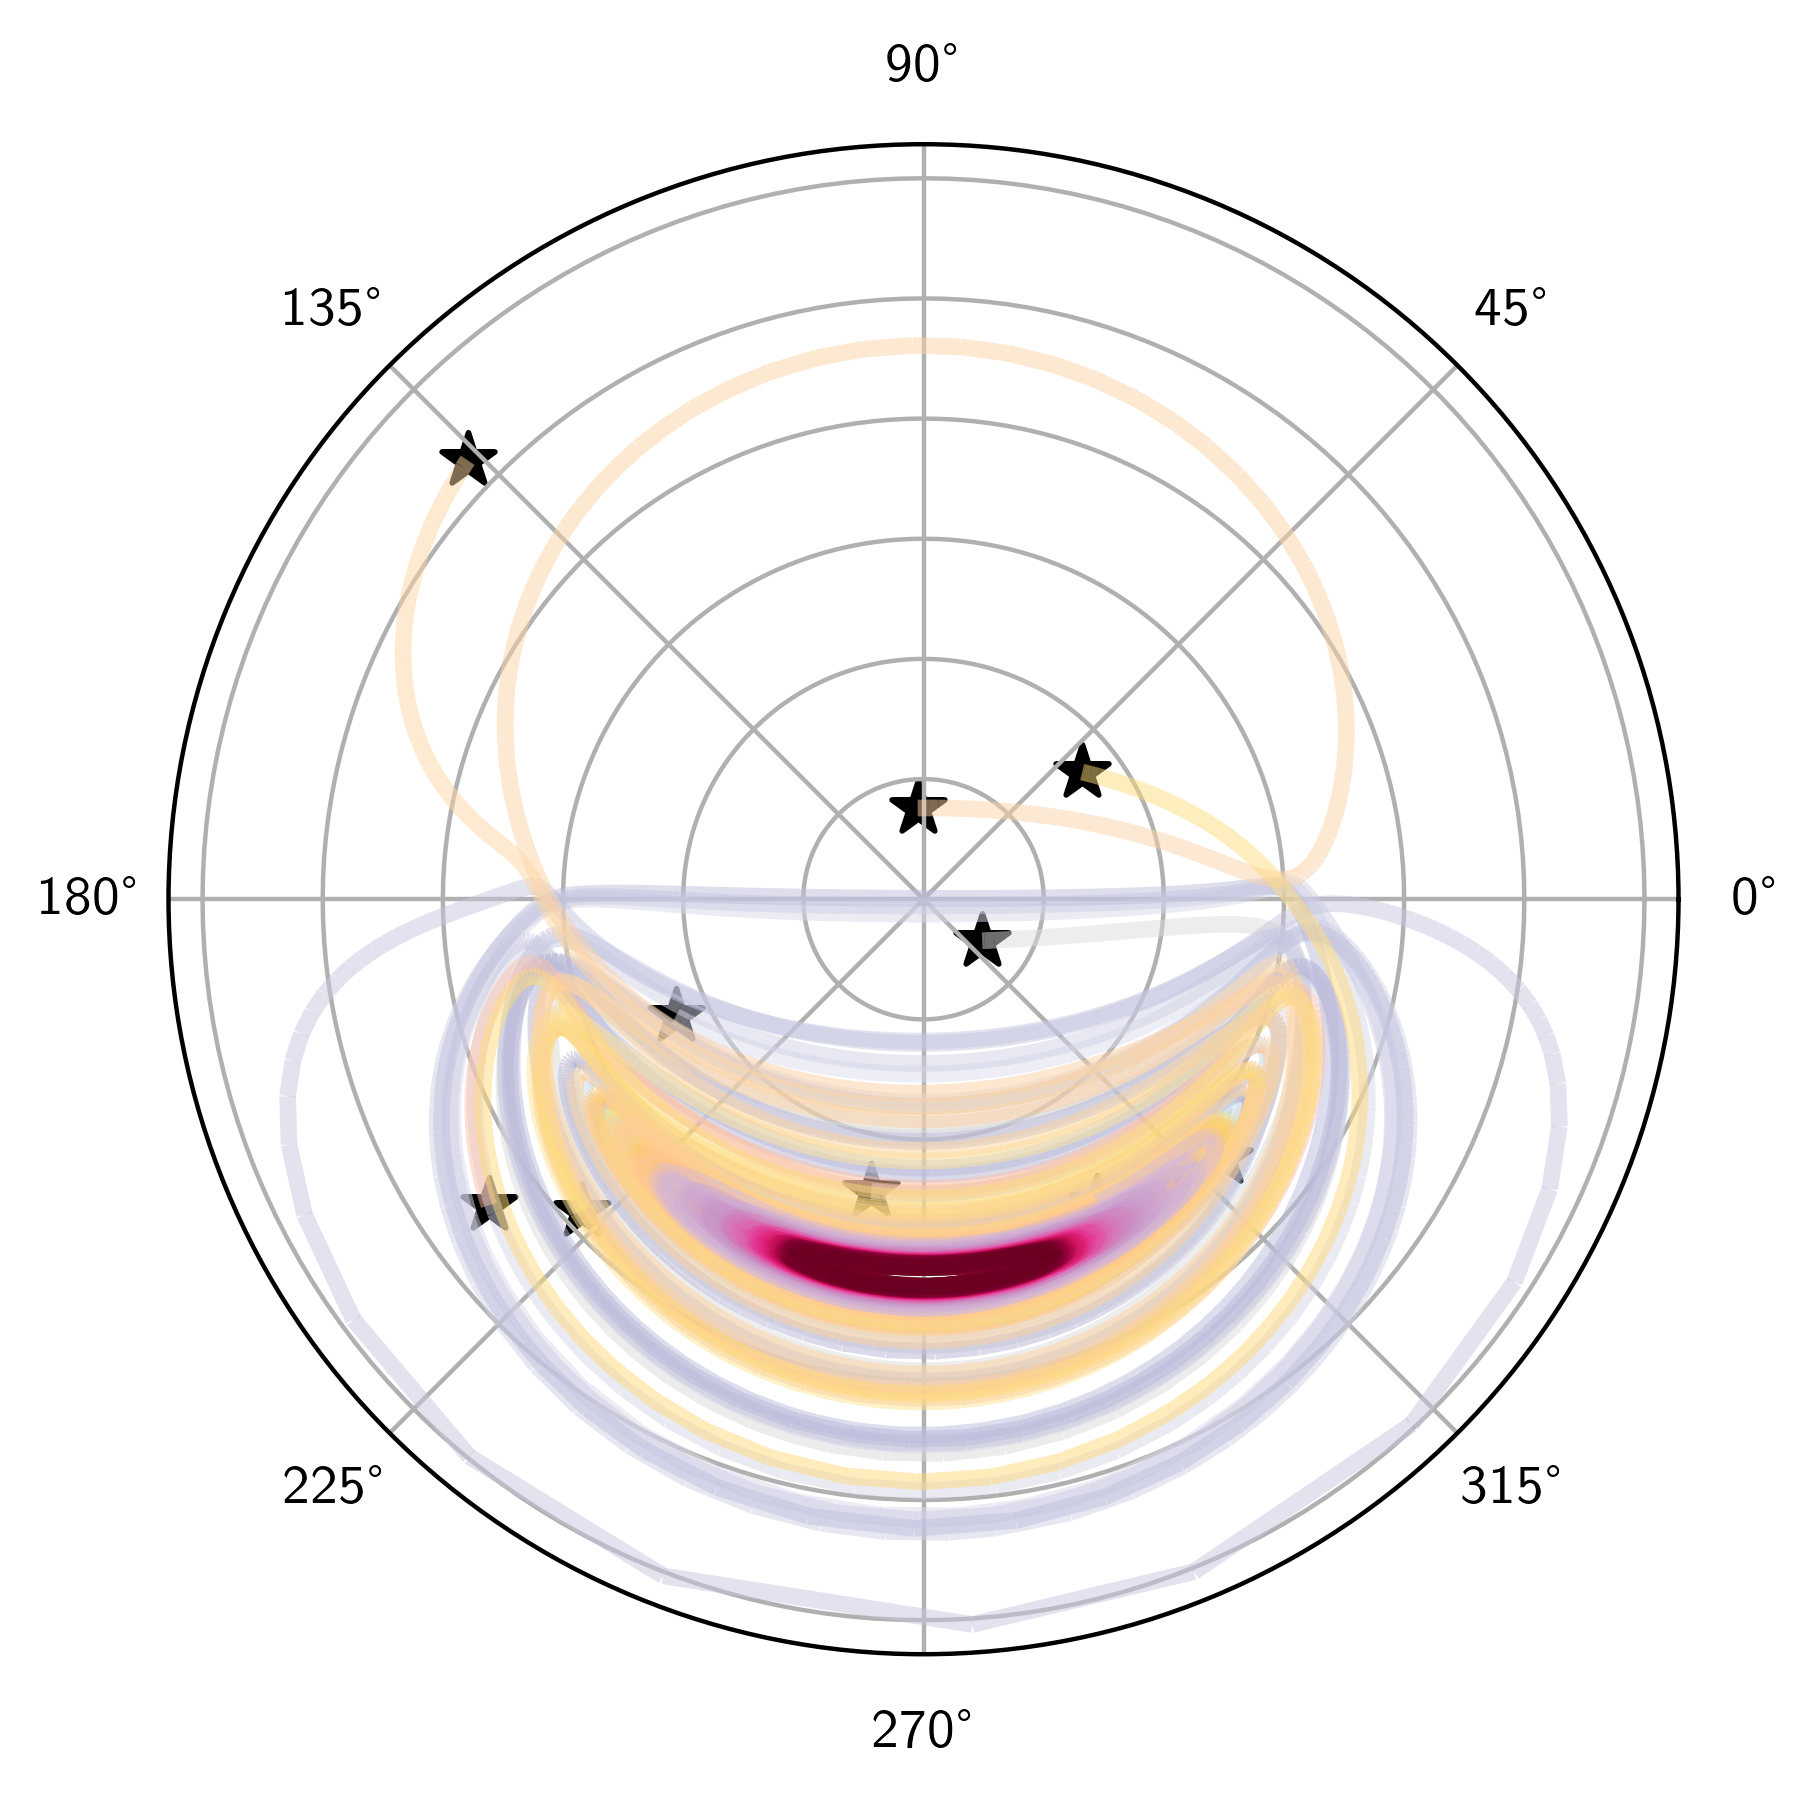

In [22]:
figsize=np.array((5, 5))
dpi=400

teta = np.hstack([i0[0] for i0 in std_eta_list])
# tidx = np.isclose(case_idx, 0)
# tidx = np.isclose(case_idx, 2)
tidx = np.logical_and(np.isclose(case_idx, 3), teta > 2.8)

sub_idx = np.random.choice(np.sum(tidx), 10, replace=False)
fig = spf_tb.show_pickle_theta_phi_list(pickle_path_list[tidx][sub_idx], figsize=figsize, dpi=dpi, 
                                        fast_mode=0, markersize=100, linewidth=3, 
                                        Table_t_range=(0, 3000))

In [93]:
teta = np.hstack([i0[0] for i0 in std_eta_list])
tidx = np.isclose(case_idx, 3)
teta[tidx][:100]

array([2.97421997, 2.97466501, 2.97462731, 2.97627386, 2.97671818,
       2.97529283, 2.97625938, 3.00373324, 2.97436581, 0.06902864,
       2.97441195, 2.97714341, 2.97533423, 2.97674204, 2.97511479,
       2.97575075, 2.97565339, 2.97254467, 2.97918507, 2.974428  ,
       2.9778227 , 2.97587487, 2.974704  , 2.97383689, 2.97589971,
       2.9758572 , 2.97238449, 2.9732745 , 2.97520253, 2.97687755,
       2.97394175, 2.97271353, 2.97580189, 2.97200151, 2.97448386,
       2.97542479, 2.97359901, 2.97459369, 2.97722197, 2.97519332,
       2.97372444, 2.97732671, 2.97474962, 2.97578293, 2.97665619,
       2.97477088, 2.97535669, 2.97492827, 2.97499813, 2.97650466,
       2.97440898, 2.97984323, 2.97534676, 2.97410674, 2.97568375,
       2.97696054, 2.97503871, 2.97626654, 2.97564476, 2.97479424,
       2.97677486, 2.97669711, 2.97383975, 2.97392435, 2.97650124,
       2.97325024, 2.97523084, 2.97394957, 2.97709413, 2.97403263,
       2.97539334, 2.97529405, 2.97430251, 2.97367525, 2.97740

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th0.971_ph1.152_ps4.894_D20200424_T002331.pickle


True

<Figure size 1500x1500 with 0 Axes>

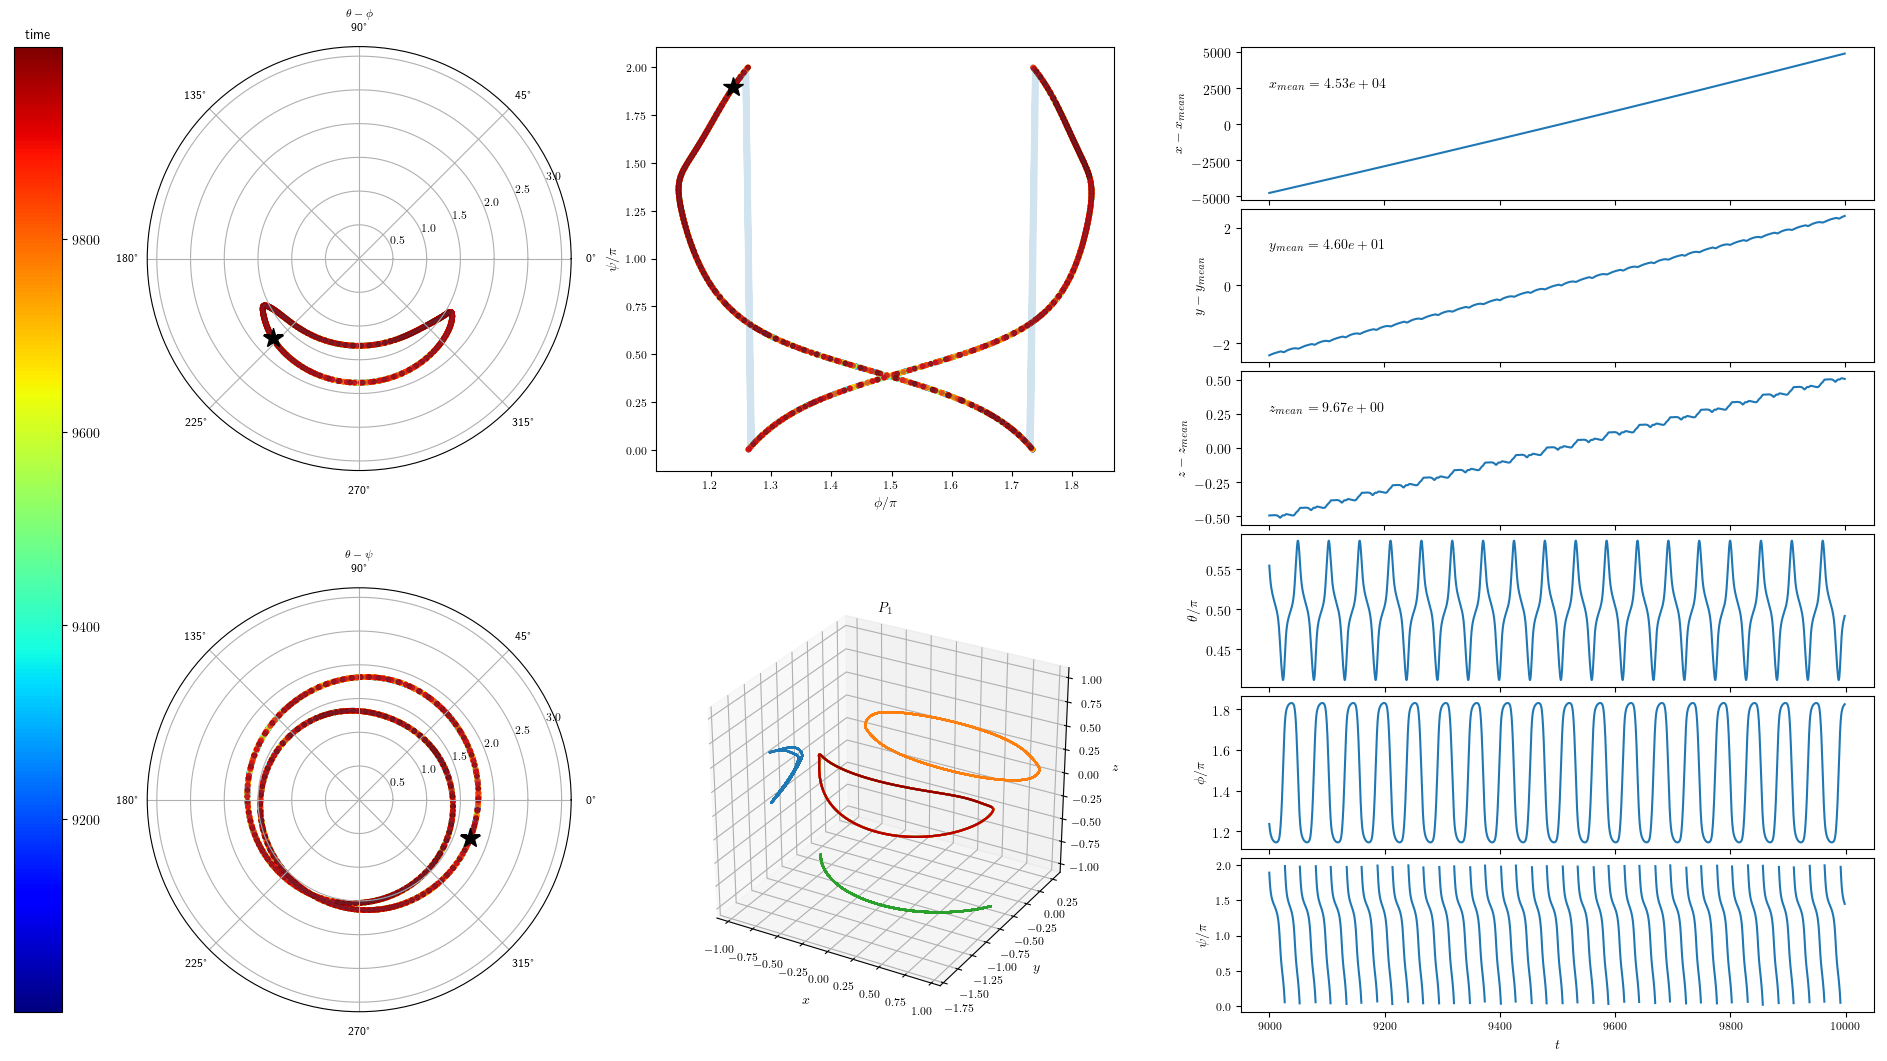

In [25]:
tidx = np.isclose(case_idx, 2)
tpath = pickle_path_list[tidx][1]
fig = plt.figure(figsize=(5, 5), dpi=300)
show_colorbar = False 

with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
idx = Table_t > 9000
print(tpath)
spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                            Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])
# spf_tb.light_show_theta_phi(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
#                             Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], 
#                             fig=fig, show_colorbar=show_colorbar)

(array([1.300e+01, 0.000e+00, 8.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.514e+03]), array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]), <a list of 10 Patch objects>)
1536, -0.0002, -0.0013, -0.0010±5.96e-05
0.9424±0.0420, 0.012406


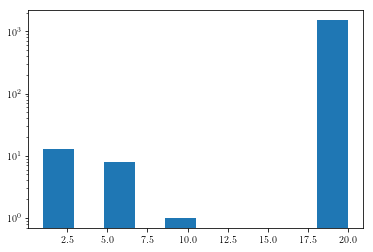

In [35]:
use_autocorrelate_fre_list = eta_autocorrelate_fre_list
# tidx = np.isclose(case_idx, 2)
# tidx = np.isclose(case_idx, 0)
tidx = np.isclose(case_idx, 3)

t1 = use_autocorrelate_fre_list[tidx][:, 0]
t2 = use_autocorrelate_fre_list[tidx][:, 1][t1[:, 0] / t1[:, 1] > 1]
print(plt.hist(t1[:, 0] / t1[:, 1], 10, log=True, ))
print('%d, %.4f, %.4f, %.4f±%.2e' % (tidx.sum(), dy_list[tidx].max(), dy_list[tidx].min(), 
                                      dy_list[tidx].mean(), dy_list[tidx].std()))
if t2.size > 0:
    tpct = (t2[:, 1] / t2[:, 0]).max()
else:
    tpct = 0
print('%.4f±%.4f, %f' % (np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max(), tpct))

(array([  10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1880.]),
 array([0.01511773, 0.11007511, 0.20503249, 0.29998986, 0.39494724,
        0.48990462, 0.584862  , 0.67981938, 0.77477676, 0.86973414,
        0.96469152]),
 <a list of 10 Patch objects>)

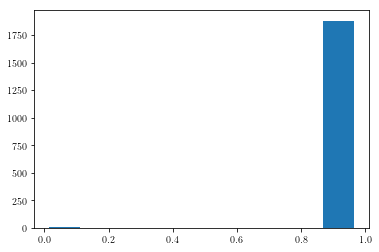

In [48]:
use_case = 5
tidx = np.isclose(case_idx, use_case)
plt.hist(std_eta_list[tidx][:, 0] / np.pi)

In [ ]:
from shutil import copyfile
from datetime import datetime
from src.objComposite import *

dbg_mode = False
# dbg_mode = 2
figsize=np.array((16, 9))*0.7
dpi = 500
tmin = 9800

title_handle = 'model 2, (elliptical helix tail), $\\omega=0$'
teta = np.hstack([i0[0] for i0 in std_eta_list])
case_info_list = [('d3', np.isclose(case_idx, 0)), 
                  ('d2', np.isclose(case_idx, 2)), 
                  ('d1', np.logical_and(np.isclose(case_idx, 3), teta > 2.8)), ]

for i0 in range(5): 
    for trj_handle, tidx0 in case_info_list:
        suptitle = '%s, %s, case %2d' % (title_handle, trj_handle, i0)
        tpath = pickle_path_list[tidx0][i0]
        print(tpath)
        with open(tpath, 'rb') as handle:
            tpick = pickle.load(handle)
        Table_t = tpick['Table_t']
        Table_dt = tpick['Table_dt']
        Table_X = tpick['Table_X']
        Table_P = tpick['Table_P']
        Table_P2 = tpick['Table_P2']
        Table_theta = tpick['Table_theta']
        Table_phi = tpick['Table_phi']
        Table_psi = tpick['Table_psi']
        Table_eta = tpick['Table_eta']
        table_path = os.path.join('/home/zhangji/stokes_flow_master/src', 
                                  '%s.pickle' % tpick['problem_kwargs']['table_name'])
        with open(table_path, 'rb') as handle:
            table_path = pickle.load(handle)
        problem_kwargs = table_path['problem_kwargs']

        tidx = Table_t > tmin
        anim = spf_tb.make_table_video_geo_v2(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                                      Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                                      stp=1, interval=20, trange_geo=None, trange_trj=None, 
                                      create_obj_at_fun=get_ecoli_nodes_split_at, resampling_fct=5, 
                                      dbg_mode=dbg_mode, figsize=figsize, dpi=dpi, 
                                      suptitle=suptitle, **problem_kwargs)
        tname0 = '%s_%s_%02d' % (job_dir, trj_handle, i0)
        tname = os.path.join(os.getcwd(), 'MOVIE', '%s.pickle' % tname0)
        copyfile(tpath, tname)
        tname = os.path.join(os.getcwd(), 'MOVIE', '%s.mp4' % tname0)
        anim.save(tname, writer='ffmpeg', fps=30)
        print(datetime.now(), 'save to %s' % tname)
        print()

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th0.650_ph3.222_ps4.276_D20200501_T131338.pickle
trange_geo= 1.444325380188599


2020-07-28 13:13:06.079621 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d3_00.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.379_ph4.490_ps0.055_D20200424_T014814.pickle
trange_geo= 1.4443253801885996


2020-07-28 13:51:48.241840 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d2_00.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.839_ph3.819_ps5.232_D20200424_T001615.pickle
trange_geo= 1.4443253801885991


2020-07-28 14:52:33.652637 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d1_00.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.077_ph2.421_ps2.149_D20200424_T004805.pickle
trange_geo= 1.4443253801885991


2020-07-28 15:25:07.507822 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d3_01.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th0.971_ph1.152_ps4.894_D20200424_T002331.pickle
trange_geo= 1.4443253801885996


2020-07-28 16:04:46.880180 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d2_01.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.680_ph4.155_ps0.029_D20200501_T145855.pickle
trange_geo= 1.4443253801885996


2020-07-28 17:06:05.577663 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d1_01.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th0.796_ph3.568_ps4.011_D20200501_T104341.pickle
trange_geo= 1.4443253801885996


2020-07-28 17:35:42.085041 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d3_02.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th2.830_ph3.317_ps3.490_D20200423_T235325.pickle
trange_geo= 1.4443253801885991


2020-07-28 18:15:04.978436 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d2_02.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.410_ph0.197_ps5.145_D20200423_T233241.pickle
trange_geo= 1.4443253801885998


2020-07-28 19:16:33.143302 save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/MOVIE/ecoC01B05_wt0.1_psi_rada_d1_02.mp4

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_wt0.1_psi_rada/th1.450_ph1.967_ps2.466_D20200424_T011313.pickle
trange_geo= 1.444325380188599


In [31]:
from shutil import copyfile

title_handle = 'model 2, elliptical helix tail, $\\omega=0.1$'
teta = np.hstack([i0[0] for i0 in std_eta_list])
case_info_list = [('d3', np.isclose(case_idx, 0)), 
                  ('d2', np.isclose(case_idx, 2)), 
                  ('d1', np.logical_and(np.isclose(case_idx, 3), teta > 2.8)), ]

for trj_handle, tidx0 in case_info_list:
    for i0 in range(5): 
        suptitle = '%s, %s, case %2d' % (title_handle, trj_handle, i0)
        tpath = pickle_path_list[tidx0][i0]
#         print(tpath)
        tname0 = '%s_%s_%02d' % (job_dir, trj_handle, i0)
        tname = os.path.join(os.getcwd(), 'orintation', '%s.pickle' % tname0)
        copyfile(tpath, tname)
        tname = os.path.join(os.getcwd(), 'orintation', '%s.mat' % tname0)
        with open(tpath, 'rb') as handle:
            tpick = pickle.load(handle)
            savemat(tname, mdict={'tpick': tpick})
        print('save to %s' % tname)

save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d3_00.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d3_01.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d3_02.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d3_03.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d3_04.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d2_00.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d2_01.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/orintation/ecoC01B05_wt0.1_psi_rada_d2_02.mat
save to /home/zhangji/stokes_flow_master/head_Force/do_calculate